# Contributions of moisture transport, evaporation and precipitation

In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import atmotrans as atm

## ERA5 - entire monsoon season

In [3]:
### seasonal means  ###
time = np.arange(1979,2020)

f= '../moisture_transport/moisture_transport/cache/srfc-monthly/prcp_annual_means.nc'
p = xr.open_dataset(f)
prcp = p.tp[:,:-1,:-1]*1000
f= '../moisture_transport/moisture_transport/cache/srfc-monthly/evapo_annual_means.nc'
e = xr.open_dataset(f)
evapo = e.e[:,:-1,:-1]*-1000
f= '../moisture_transport/moisture_transport/cache/srfc-monthly/moistdiv_annual_means.nc'
m= xr.open_dataset(f)
mfc = - m['vimd'][:,:-1,:-1] 
mfc_clim = np.nanmean(mfc.values, axis = 0)

m.close()
p.close()
e.close()

In [4]:
# calculate weightes mean area
def weighted_mean_timeseries(arr):
    dataset=xr.DataArray(arr,  dims= {'time':data.latitude[:-1].values,'latitude':data.latitude[:-1].values, 'longitude':data.longitude[:-1].values})
    weights = np.cos(np.deg2rad(data.latitude[:-1]))
    weights.name = "weights"
    data_weighted = dataset.weighted(weights)
    weighted_mean = data_weighted.mean(("latitude", "longitude"), skipna= True)
    return weighted_mean.values


In [5]:
# Extract timeseries for specific regions 

### TP ###
dem = '/media/juli/Data/projects/data/elevation/GMTED2010_15n030_0125deg.nc'
elevation = xr.open_dataset(dem)['elevation']
elevations_tp= elevation[800:1200, 1840:2480]
lat = np.linspace(800,1199,200)
lon= np.linspace(1840,2479,320)
elevs= elevations_tp.interp(nlat= lat, nlon= lon )
elevs= np.flip(elevs, axis = 0 )
mfc_tp= mfc.copy()
prcp_tp = prcp.copy()
evapo_tp = evapo.copy()
mfc_tp.values[:,elevs < 3000 ] = np.nan
prcp_tp.values[:,elevs < 3000 ] = np.nan
evapo_tp.values[:,elevs < 3000 ] = np.nan

### Land ### 
lm= xr.open_dataset('../moisture_transport/moisture_transport/lsm_era5_tp.nc')['lsm'][0].values
lsm= np.flip(lm, axis = 0)
mfc_land= mfc.copy()
prcp_land= prcp.copy()
evapo_land= evapo.copy()
mfc_land.values[:, lsm == 0] = np.nan
prcp_land.values[:, lsm== 0 ] = np.nan
evapo_land.values[:, lsm == 0] = np.nan

### convergence zones ###
mfc_con= mfc.copy()
prcp_con= prcp.copy()
evapo_con= evapo.copy()
mfc_con.values[:, mfc_clim < 0] = np.nan
prcp_con.values[:,  mfc_clim < 0 ] = np.nan
evapo_con.values[:, mfc_clim < 0] = np.nan

### divergence zones ###
mfc_div= mfc.copy()
prcp_div= prcp.copy()
evapo_div= evapo.copy()
mfc_div.values[:, mfc_clim > 0] = np.nan
prcp_div.values[:,  mfc_clim > 0 ] = np.nan
evapo_div.values[:, mfc_clim > 0] = np.nan

In [6]:
# area-weighted means timeseries
p_tp = weighted_mean_timeseries(prcp_tp-np.nanmean(prcp_tp, axis = 0) )
e_tp = weighted_mean_timeseries(evapo_tp- np.nanmean(evapo_tp, axis = 0))
mt_tp = weighted_mean_timeseries(mfc_tp- np.nanmean(mfc_tp, axis = 0))
p_e_tp = weighted_mean_timeseries( (prcp_tp-np.nanmean(prcp_tp, axis = 0) ) - (evapo_tp- np.nanmean(evapo_tp, axis = 0)))

p_land = weighted_mean_timeseries(prcp_land-np.nanmean(prcp_land, axis = 0) )
e_land = weighted_mean_timeseries(evapo_land- np.nanmean(evapo_land, axis = 0))
mt_land = weighted_mean_timeseries(mfc_land- np.nanmean(mfc_land, axis = 0))
p_e_land = weighted_mean_timeseries((prcp_land-np.nanmean(prcp_land, axis = 0) ) - (evapo_land- np.nanmean(evapo_land, axis = 0)))

p_con = weighted_mean_timeseries(prcp_con-np.nanmean(prcp_con , axis = 0) )
e_con = weighted_mean_timeseries(evapo_con- np.nanmean(evapo_con , axis = 0))
mt_con = weighted_mean_timeseries(mfc_con - np.nanmean(mfc_con , axis = 0))
p_e_con = weighted_mean_timeseries((prcp_con -np.nanmean(prcp_con , axis = 0) ) - (evapo_con- np.nanmean(evapo_con, axis = 0)))

p_div = weighted_mean_timeseries(prcp_div -np.nanmean(prcp_div, axis = 0) )
e_div = weighted_mean_timeseries(evapo_div - np.nanmean(evapo_div, axis = 0))
mt_div = weighted_mean_timeseries(mfc_div - np.nanmean(mfc_div, axis = 0))
p_e_div = weighted_mean_timeseries((prcp_div -np.nanmean(prcp_div, axis = 0) ) - (evapo_div- np.nanmean(evapo_div, axis = 0)))


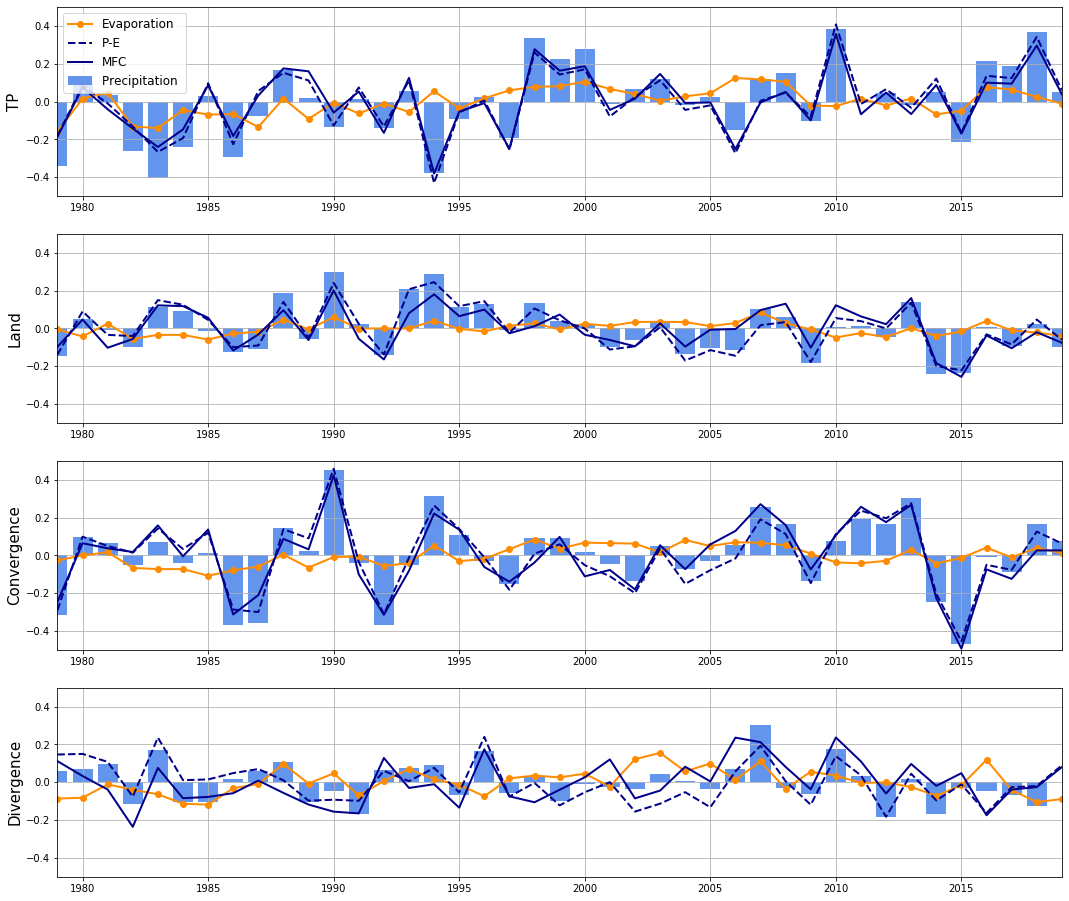

In [9]:
# plot 

s= 15

fig, axes = plt.subplots(4, 1, sharex=False, figsize=(18, 16))

axes[0].bar( time, p_tp , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[0].plot(time, e_tp  , label = 'Evaporation', color = 'darkorange',marker = 'o', linewidth = 2.0)
axes[0].plot(time, p_e_tp  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[0].plot(time, mt_tp , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[0].set_xlim(time[0], time[-1])
axes[0].set_ylim(-0.5, 0.5)
axes[0].set_ylabel('TP', fontsize = s)
axes[0].legend(fontsize= 12, loc = 'upper left')
axes[0].grid()

axes[1].bar( time, p_land , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[1].plot(time, e_land  , label = 'Evaporation', color = 'darkorange',marker = 'o', linewidth = 2.0)
axes[1].plot(time, p_e_land  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[1].plot(time, mt_land  , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[1].set_ylabel('Land', fontsize = s)
axes[1].set_xlim(time[0], time[-1])
axes[1].set_ylim(-0.5, 0.5)
axes[1].grid()

axes[2].bar( time, p_con , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[2].plot(time, e_con  , label = 'Evaporation', color = 'darkorange', marker = 'o', linewidth = 2.0)
axes[2].plot(time, p_e_con  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[2].plot(time, mt_con  , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[2].set_ylabel('Convergence', fontsize = s)
axes[2].set_xlim(time[0], time[-1])
axes[2].set_ylim(-0.5, 0.5)
axes[2].grid()


axes[3].bar( time, p_div , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[3].plot(time, e_div  , label = 'Evaporation', color = 'darkorange',marker = 'o', linewidth = 2.0)
axes[3].plot(time, p_e_div  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[3].plot(time, mt_div , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[3].set_ylabel('Divergence', fontsize = s)
axes[3].set_xlim(time[0], time[-1])
axes[3].set_ylim(-0.5, 0.5)
axes[3].grid()

plt.savefig('plots/components.png')
plt.show()


What are the robust convergence/ divergence zones? 

~  90% at least mean (climatological value)

In [234]:
yearcount = np.zeros(mfc_clim.shape)

for y in np.arange(41):
    year= mfc_con[y]
    yearcount[year <= mfc_clim ] += 1 
    
yearcount[yearcount == 0] = np.nan

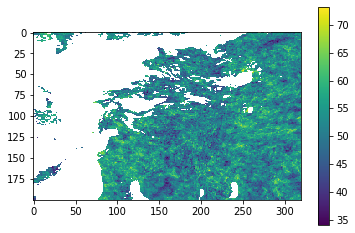

In [235]:
plt.imshow(yearcount/41 * 100)
plt.colorbar()

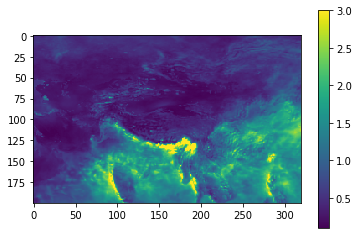

In [223]:
# stanard deviation moisture flux divergence
plt.imshow(np.nanstd(mfc,axis = 0),vmin = 0.1, vmax = 3, cmap = 'viridis')
plt.colorbar()

## ERA5 - per different months

In [27]:
### anomalies ###
time = np.arange(1979,2020)

f= '../moisture_transport/moisture_transport/cache/prcp/precip_sep_anomalies.nc'
p = xr.open_dataset(f)
prcp = -p.tp[:,:-1,:-1]*1000
f= '../moisture_transport/moisture_transport/cache/srfc-monthly/evapo_sep_anomalies.nc'
e = xr.open_dataset(f)
evapo =- e.e[:,:-1,:-1]*-1000
f= '../moisture_transport/moisture_transport/cache/srfc-monthly/vimd_sep_anomalies.nc'
m = xr.open_dataset(f)
mfc =  m['vimd'][:,:-1,:-1] 

m.close()
p.close()
e.close()

In [28]:
def weighted_mean(arr):
    dataset=xr.DataArray(arr,  dims= {'time':data.latitude[:-1].values,'latitude':data.latitude[:-1].values, 'longitude':data.longitude[:-1].values})
    weights = np.cos(np.deg2rad(data.latitude[:-1]))
    weights.name = "weights"
    data_weighted = dataset.weighted(weights)
    weighted_mean = data_weighted.mean(("latitude", "longitude"), skipna= True)
    return weighted_mean.values

In [29]:
# Extract timeseries for specific regions 


### TP ###
dem = '/media/juli/Data/projects/data/elevation/GMTED2010_15n030_0125deg.nc'
elevation = xr.open_dataset(dem)['elevation']
elevations_tp= elevation[800:1200, 1840:2480]
lat = np.linspace(800,1199,200)
lon= np.linspace(1840,2479,320)
elevs= elevations_tp.interp(nlat= lat, nlon= lon )
elevs= np.flip(elevs, axis = 0 )
mfc_tp= mfc.copy()
prcp_tp = prcp.copy()
evapo_tp = evapo.copy()
mfc_tp.values[:,elevs < 3000 ] = np.nan
prcp_tp.values[:,elevs < 3000 ] = np.nan
evapo_tp.values[:,elevs < 3000 ] = np.nan

### Land ### 
lm= xr.open_dataset('../moisture_transport/moisture_transport/lsm_era5_tp.nc')['lsm'][0].values
lsm= np.flip(lm, axis = 0)
mfc_land= mfc.copy()
prcp_land= prcp.copy()
evapo_land= evapo.copy()
mfc_land.values[:, lsm == 0] = np.nan
prcp_land.values[:, lsm== 0 ] = np.nan
evapo_land.values[:, lsm == 0] = np.nan

### convergence zones ###
mfc_con= mfc.copy()
prcp_con= prcp.copy()
evapo_con= evapo.copy()
mfc_con.values[:, mfc_clim < 0] = np.nan
prcp_con.values[:,  mfc_clim < 0 ] = np.nan
evapo_con.values[:, mfc_clim < 0] = np.nan

### divergence zones ###
mfc_div= mfc.copy()
prcp_div= prcp.copy()
evapo_div= evapo.copy()
mfc_div.values[:, mfc_clim > 0] = np.nan
prcp_div.values[:,  mfc_clim > 0 ] = np.nan
evapo_div.values[:, mfc_clim > 0] = np.nan

In [30]:
# area-weighted means timeseries
p_tp = weighted_mean(prcp_tp)
e_tp = weighted_mean(evapo_tp)
mt_tp = weighted_mean(mfc_tp)
p_e_tp = weighted_mean( prcp_tp - evapo_tp)

p_land = weighted_mean(prcp_land)
e_land = weighted_mean(evapo_land)
mt_land = weighted_mean(mfc_land)
p_e_land = weighted_mean(prcp_land - evapo_land)

p_con = weighted_mean(prcp_con )
e_con = weighted_mean(evapo_con)
mt_con = weighted_mean(mfc_con )
p_e_con = weighted_mean(prcp_con -evapo_con)

p_div = weighted_mean(prcp_div  )
e_div = weighted_mean(evapo_div)
mt_div = weighted_mean(mfc_div )
p_e_div = weighted_mean(prcp_div- evapo_div )


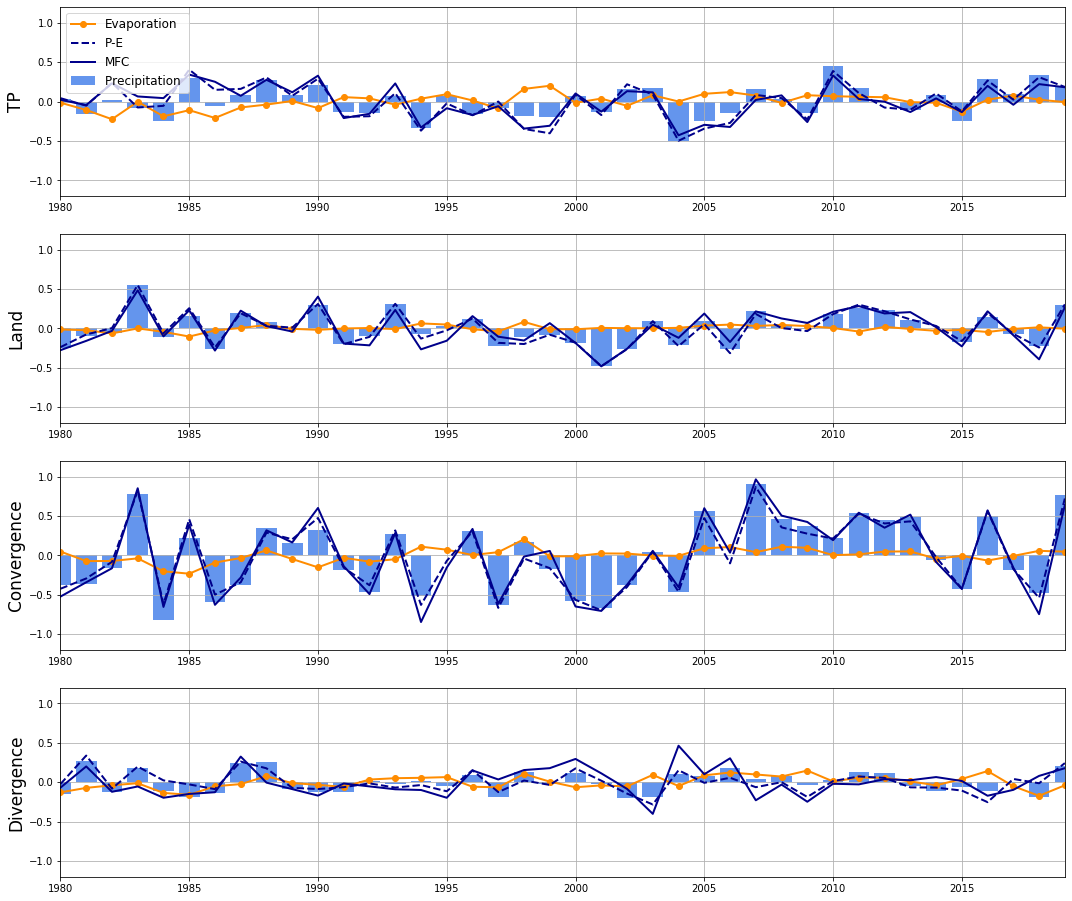

In [31]:
# plot 

s= 17
y_min = -1.2
y_max = 1.2

fig, axes = plt.subplots(4, 1, sharex=False, figsize=(18, 16))

time= np.arange(1980,2020)
axes[0].bar( time, p_tp , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[0].plot(time, e_tp  , label = 'Evaporation', color = 'darkorange',marker = 'o', linewidth = 2.0)
axes[0].plot(time, p_e_tp  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[0].plot(time, mt_tp , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[0].set_xlim(time[0], time[-1])
axes[0].set_ylim(y_min, y_max)
axes[0].set_ylabel('TP', fontsize = s)
axes[0].legend(fontsize= 12, loc = 'upper left')
axes[0].grid()

axes[1].bar( time, p_land , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[1].plot(time, e_land  , label = 'Evaporation', color = 'darkorange',marker = 'o', linewidth = 2.0)
axes[1].plot(time, p_e_land  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[1].plot(time, mt_land  , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[1].set_ylabel('Land', fontsize = s)
axes[1].set_xlim(time[0], time[-1])
axes[1].set_ylim(y_min, y_max)
axes[1].grid()

axes[2].bar( time, p_con , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[2].plot(time, e_con  , label = 'Evaporation', color = 'darkorange', marker = 'o', linewidth = 2.0)
axes[2].plot(time, p_e_con  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[2].plot(time, mt_con  , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[2].set_ylabel('Convergence', fontsize = s)
axes[2].set_xlim(time[0], time[-1])
axes[2].set_ylim(y_min, y_max)
axes[2].grid()


axes[3].bar( time, p_div , label = 'Precipitation ', color = 'cornflowerblue', linewidth = 2.0)
axes[3].plot(time, e_div  , label = 'Evaporation', color = 'darkorange',marker = 'o', linewidth = 2.0)
axes[3].plot(time, p_e_div  , label = 'P-E', color ='darkblue', linestyle = '--',linewidth = 2.0)
axes[3].plot(time, mt_div , label = 'MFC', color = 'darkblue', linewidth= 2.0)
axes[3].set_ylabel('Divergence', fontsize = s)
axes[3].set_xlim(time[0], time[-1])
axes[3].set_ylim(y_min, y_max)
axes[3].grid()


plt.savefig('plots/components_sep.png')
plt.show()